# Future Sales Prediction
 
 
 
This is a challenging time-series dataset consisting of daily sales data, 
kindly provided by one of the largest Russian software firms - 1C Company. 
We need to predict total sales for every product and store in the next month.
 
This dataset has been acquired from the kaggel platform 
(https://www.kaggle.com/c/competitive-data-science-predict-future-sales/overview/evaluation)

 
 



###### The objective requires us to predict sales for the next month at a store-item combination.
  *  First We can predict Sales for whole company
  *  Then we can plan store wise prediction 
  *  Item-wise prediction 
  *  We can decide the popular store
  *  Different 
 
 It may help customer to take a call on business expansion needs to be done on which area

## Data Preparation, Exploratory Analysis

Following steps can be performed for data preparation, analysis and modelling to get the best predictions. The list might not be complete but have tried to list down as much as possible.
###### STATISTICALLY EXPLORING DATA - A CHECK LIST
* Check data dimensions, Rows and Columns
* Columns Names
* Datatype(s) and Data Info
* Unique Values per Column (to decide whether to make column Categorical?)
###### CLEANING DATA
* Look for any Missing Data
* Can identify observations on Missing Data
* Graph the representations of Missing Data
* Decide whether to populate or to remove Missing Data 
* Identify the possible impact of it while Modelling

##### Some questions to guide the initial exploration:

* Data shape, missings, first rows,
* What are the entropy of each column
* What are the principal shops?
* What are the distributions of items price and total items sold by each item;
* What are the more sold items and which are their categories;
* What's the range of date sales;
* How many items were sold each day. Could we see any peak in christmas, valentine's day or another special day.
* Crossing some of this features
And a lot of more questions that probably will raise through the exploration.
Further we need to analyze the archived data statistically 
We need to fit the best Machine Learning model for further prediction

## File descriptions

**sales_train.csv** - the training set. Daily historical data from January 2013 to October 2015.

**test.csv** - the test set. You need to forecast the sales for these shops and products for November 2015.

**sample_submission.csv** - a sample submission file in the correct format.

**items.csv** - supplemental information about the items/products.

**item_categories.csv**  - supplemental information about the items categories.

**shops.csv** - supplemental information about the shops.

## Data fields

**ID** - an Id that represents a (Shop, Item) tuple within the test set

**shop_id** - unique identifier of a shop

**item_id** - unique identifier of a product

**item_category_id** - unique identifier of item category

**item_cnt_day** - number of products sold. You are predicting a monthly amount of this measure

**item_price** - current price of an item

**date** - date in format dd/mm/yyyy

**date_block_num** - a consecutive month number, used for convenience. January 2013 is 0, February 2013 is 1,..., October 2015 is 33

**item_name** - name of item

**shop_name** - name of shop

**item_category_name** - name of item category

In [5]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from scipy import stats
import random
import gc

### Importing the Datasets


In [13]:
df_train = pd.read_csv('sales_train.csv')

df_categories = pd.read_csv("item_categories.csv")

df_items = pd.read_csv("items.csv")

df_shops = pd.read_csv("shops.csv")

df_test = pd.read_csv("test.csv")

df_test_m = pd.read_csv("merged_test_data.csv")
df_train_m = pd.read_csv("merged_tain_data.csv")

In [7]:
gc.collect()

60

### Knowing my dataset

In [8]:
def knowningData(df, limit=5): #seting the function with df, 
    print(f"Dataset Shape: {df.shape}")
    print('Unique values per column: ')
    print(df.nunique())
    print("################")
    print("")    
    for column in df.columns: #initializing the loop
        print("Column Name: ", column )
        print("Checking further", 
              " | Total nulls: ", (round(df[column].isnull().sum() / len(df[column]) * 100,2)),
              " | Total unique values: ", df.nunique()[column], #print the data and % of nulls
              " | Missing: ", df[column].isna().sum())
        print("Top 5 most frequent values: ")
        print(round(df[column].value_counts()[:limit] / df[column].value_counts().sum() * 100,2))
        print("")
        print("####################################")

In [9]:
knowningData(df_train_m)

Dataset Shape: (2935849, 11)
Unique values per column: 
Unnamed: 0            2935849
date                     1034
date_block_num             34
shop_id                    60
item_id                 21807
item_price              19993
item_cnt_day              198
item_name               21807
item_category_id           84
item_category_name         84
shop_name                  60
dtype: int64
################

Column Name:  Unnamed: 0
Checking further  | Total nulls:  0.0  | Total unique values:  2935849  | Missing:  0
Top 5 most frequent values: 
2047       0.0
2254566    0.0
2262778    0.0
2268921    0.0
2266872    0.0
Name: Unnamed: 0, dtype: float64

####################################
Column Name:  date
Checking further  | Total nulls:  0.0  | Total unique values:  1034  | Missing:  0
Top 5 most frequent values: 
28.12.2013    0.32
29.12.2013    0.32
30.12.2014    0.32
30.12.2013    0.31
31.12.2014    0.28
Name: date, dtype: float64

####################################
Column

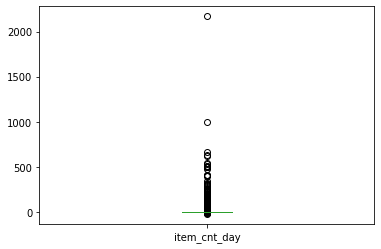

In [10]:

df_train_m.item_cnt_day.plot(kind = 'box')
plt.show()

In [11]:
df_train_m['item_cnt_day'].sort_values()



2688690     -22.0
2614214     -16.0
2697331      -9.0
998699       -6.0
2682049      -6.0
            ...  
2676429     624.0
2933626     637.0
2698367     669.0
2693208    1000.0
2694327    2169.0
Name: item_cnt_day, Length: 2935849, dtype: float64

#### Top 10 Principal Shop by shop id 

In [14]:
grouped_shop = pd.DataFrame(df_train.groupby(['shop_id'])['item_cnt_day'].sum().reset_index())

In [15]:
Top_10_shops = grouped_shop.sort_values(['item_cnt_day'], ascending = 0).head(10)
Top_10_shops

,shop_id,item_cnt_day
31,31,310777.0
25,25,241920.0
54,54,185790.0
28,28,184557.0
42,42,144934.0
57,57,141107.0
27,27,136657.0
6,6,100489.0
58,58,81734.0
46,46,78990.0


#### Ploting Top 10 Principal Shop by shop id 

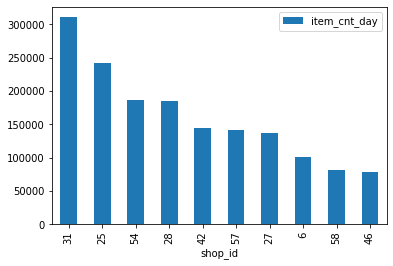

In [16]:
Top_10_shops.plot(x ='shop_id', y='item_cnt_day', kind = 'bar')
plt.show()

#### Top 10 Principal Item sold by Item id 

In [17]:
grouped_Item_id = pd.DataFrame(df_train.groupby(['item_id'])['item_cnt_day'].sum().reset_index())

#### Ploting Top 10 Principal Item by Item id 

In [18]:
Top_10_Item_sold = grouped_Item_id.sort_values(['item_cnt_day'], ascending = 0).head(10)
Top_10_Item_sold 

,item_id,item_cnt_day
20602,20949,187642.0
2749,2808,17245.0
3654,3732,16642.0
17418,17717,15830.0
5717,5822,14515.0
3656,3734,11688.0
6543,6675,10289.0
3653,3731,10099.0
1814,1855,10032.0
16493,16787,9227.0


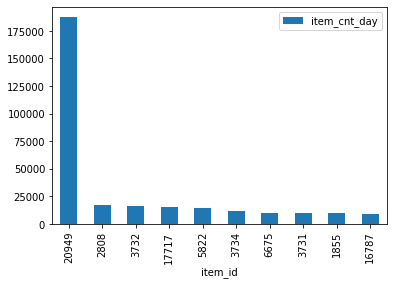

In [19]:
Top_10_Item_sold.plot(x ='item_id', y='item_cnt_day', kind = 'bar')
plt.show()

## Checking the top 10 Item category trend  


##### Maximum item sold in a day

In [20]:
item_max = df_train_m[['item_cnt_day', 'item_price', 'item_name']].sort_values('item_cnt_day', ascending=False).head(20)

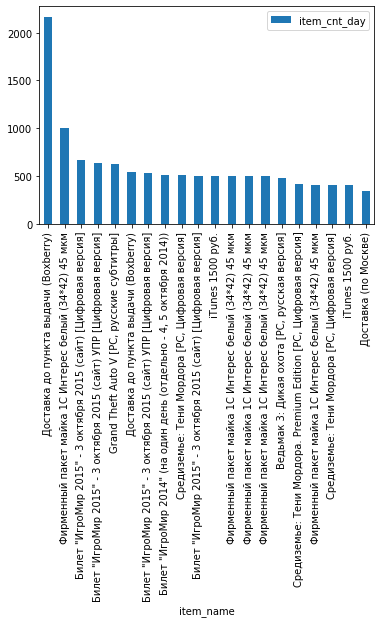

In [21]:
item_max.plot(y = 'item_cnt_day', x = 'item_name', kind = 'bar')
plt.show()

##### Top most product in the demand 

In [22]:
Product = df_train_m.item_category_name.value_counts()[:15]

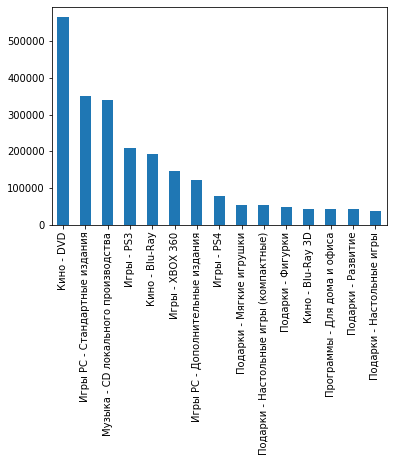

In [23]:
Product.plot(kind= "bar")

In [24]:
Top_10_shop_id = pd.DataFrame(Top_10_shops.shop_id.reset_index())

In [25]:
Top_10_shop_id['shop_id']

0    31
1    25
2    54
3    28
4    42
5    57
6    27
7     6
8    58
9    46
Name: shop_id, dtype: int64

In [26]:
grouped = pd.DataFrame(df_train_m.groupby(['shop_id', 'date_block_num'])['item_cnt_day'].sum().reset_index())

In [27]:
top10_grp = pd.merge(grouped, Top_10_shop_id, on='shop_id', how='inner')

In [28]:
top10_grp

,shop_id,date_block_num,item_cnt_day,index
0,6,0,3686.0,6
1,6,1,4007.0,6
2,6,2,4519.0,6
3,6,3,3168.0,6
4,6,4,3022.0,6
...,...,...,...,...
323,58,29,1554.0,58
324,58,30,1689.0,58
325,58,31,1738.0,58
326,58,32,1319.0,58


## Below graph shows during Christmas and New Year sale trends are more 

Text(0.5, 1.0, "TOP 10 Shop's sales trend")

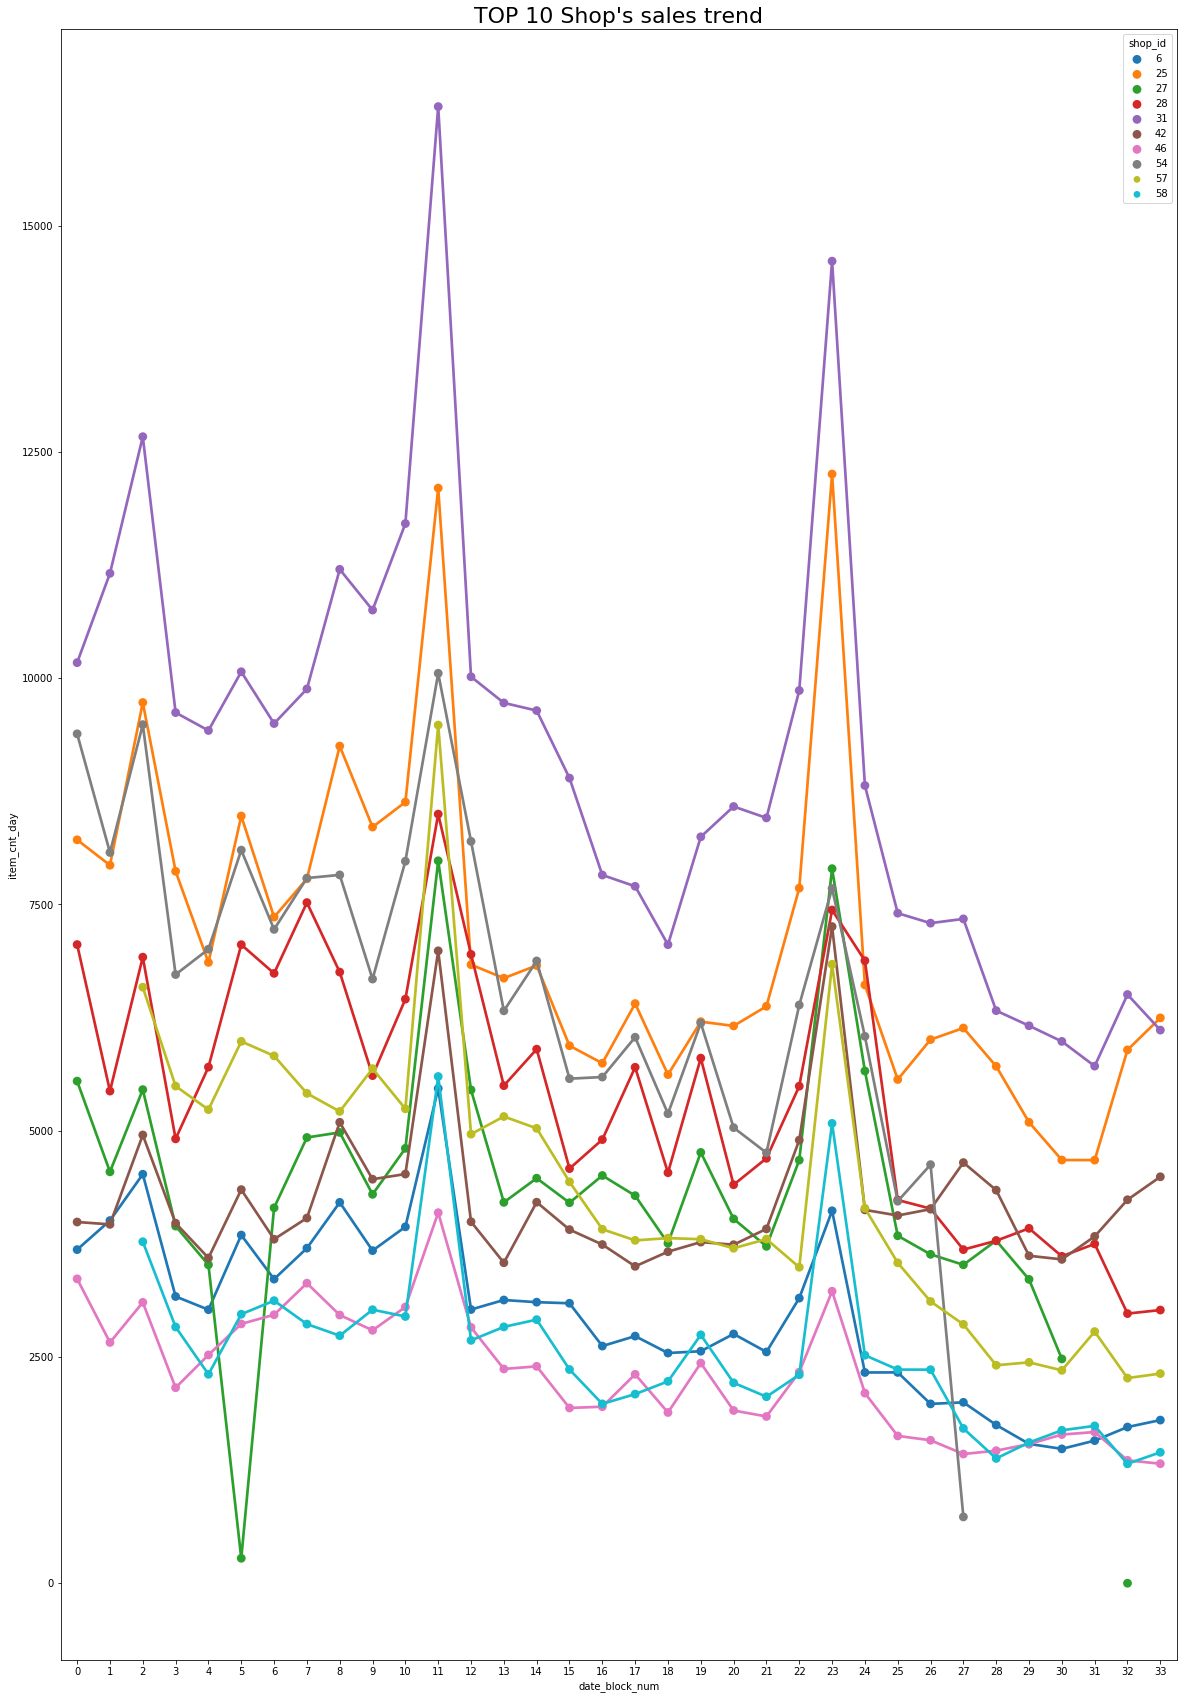

In [29]:
fig, ax = plt.subplots(figsize=(20,30))

sns.pointplot(x=top10_grp['date_block_num'], y=top10_grp['item_cnt_day'], hue=top10_grp['shop_id'], ax=ax ).set_title("TOP 10 Shop's sales trend", fontsize=22)


### So in the above amalysis we found that 

** Top 10 product (by ID)
** we have observed every year end, during chistmas time or new year time demannd is very high 
** Demand is lowest during middle periode of the year 
** But the alarming thing this as a whole there is a down trend in demand of the product 
